### 생선 분류
- 데이터셋 : fish.csv
- 피쳐/특성 : Weight, Lenght
- 타겟/라벨 : Species
- 학습방법 : 지도학습 => 분류
- 학습알고리즘: 최근접이웃알고리즘

[1] 데이터 준비

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DATA_FILE = '../data/fish.csv'

In [4]:
# 행 : Bream, Smelt, 컬럼: Species, Weight, Height => 0, 1, ,2
fishDF = pd.read_csv(DATA_FILE, usecols=[0,1,2])
fishDF.head(3)

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5


In [11]:
mask = (fishDF['Species'] == 'Bream') | (fishDF['Species'] == 'Smelt')
twoDF = fishDF[mask]
twoDF.reset_index(drop=True, inplace=True)

In [13]:
# Species 컬럼을 수치화 => Bream 0, Smelt 1
twoDF.loc[:,'Code']=twoDF['Species'].replace({'Bream':0, 'Smelt':1})

C:\Users\KDP15\AppData\Local\Temp\ipykernel_8764\3376092970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twoDF.loc[:,'Code']=twoDF['Species'].replace({'Bream':0, 'Smelt':1})


[2] 피쳐와 타겟 분리

In [17]:
features=twoDF[['Weight', 'Length']]
target=twoDF['Code']

print(f'features => {features.shape}, {features.ndim}D')
print(f'target => {target.shape}, {target.ndim}D')

features => (49, 2), 2D
target => (49,), 1D


[3] 데이터셋 준비 => 학습용, 테스트용

In [15]:
from sklearn.model_selection import train_test_split

In [18]:
# train:test = 80:20 ==> test_size = 0.2 또는 train_size = 0.8
# stratify 매개변수 : 분류일 경우 사용, 분류 타겟의 종류에 대한 비율 고려
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, stratify=target, random_state=10)

In [19]:
# train:test = 80:20 체크
print(f'X_train : {X_train.shape}, {X_train.ndim}D')
print(f'y_train : {y_train.shape}, {y_train.ndim}D')
print(f'X_test : {X_test.shape}, {X_test.ndim}D')
print(f'y_test : {y_test.shape}, {y_test.ndim}D')

X_train : (39, 2), 2D
y_train : (39,), 1D
X_test : (10, 2), 2D
y_test : (10,), 1D


In [24]:
# target 0(Bream), 1(Smelt)의 비율
y_train.value_counts()[0]/y_train.shape[0],  y_train.value_counts()[1]/y_train.shape[0]

(0.717948717948718, 0.28205128205128205)

In [28]:
y_test.value_counts()[0]/y_test.shape[0], y_test.value_counts()[1]/y_test.shape[0]

(0.7, 0.3)

[4] 훈련/학습 진행
- 학습 알고리즘 인스턴스 생성
- 학습 진행 => fit()

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
# 인스턴스 생성
model = KNeighborsClassifier()

In [31]:
# 학습 진행 ===> 학습용 데이터셋
model.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
# 학습 후 모델 파라미터
model.classes_ , model.feature_names_in_, model.n_samples_fit_

(array([0, 1], dtype=int64), array(['Weight', 'Length'], dtype=object), 39)

[5] 모델 성능평가 ==> score() 메서드   + 테스트 데이터셋

In [33]:
model.score(X_test, y_test)

1.0

[6] 예측 하기 ==> 학습/훈련과 테스트에 사용되지 않은 데이터 사용
- 주의 : 입력 데이터 ==> 2D

In [36]:
new_data = pd.DataFrame([[413,27.8]], columns=model.feature_names_in_)
new_data


,Weight,Length
0,413,27.8


In [38]:
model.predict(new_data)[0]

0

In [40]:
### 최근접한 k개 데이터 찾기
distance, index = model.kneighbors(new_data)

In [41]:
distance

array([[17.04230031, 23.10497782, 37.04875167, 37.0653477 , 50.01439793]])

In [45]:
neighbors = index.reshape(-1).tolist()

In [47]:
twoDF.iloc[neighbors]

,Species,Weight,Length,Code
25,Bream,725.0,35.0,0
0,Bream,242.0,25.4,0
21,Bream,685.0,34.0,0
6,Bream,500.0,29.7,0
22,Bream,620.0,34.5,0


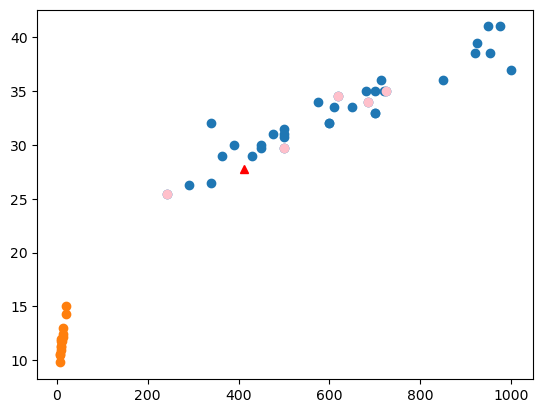

In [54]:
### 시각화로 확인
# 도미(bream), 빙어(smelt)에 대한 상관계수 ==> 2개 피쳐 Weight, Length로 Bream, Smelt 분류 가능함
plt.scatter(twoDF.loc[:34, 'Weight'], twoDF.loc[:34,'Length']) # bream
plt.scatter(twoDF.loc[35:, 'Weight'], twoDF.loc[35:,'Length']) # smelt
plt.plot(new_data['Weight'],new_data['Length'], 'r^')
plt.scatter(twoDF.iloc[neighbors]['Weight'], twoDF.iloc[neighbors]['Length'], color = 'pink')
plt.show()